In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

In [41]:
x,y = make_moons(n_samples=2000,noise=0.35)


In [42]:
dataset = pd.DataFrame({'x1':x[:,0],'x2':x[:,1],'y':y})

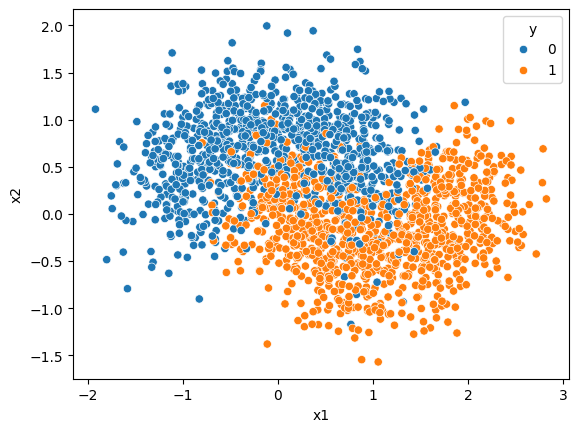

In [43]:
sns.scatterplot(x='x1',y='x2',data=dataset,hue='y')
plt.show()

In [46]:
x_a = dataset.iloc[:,:-1]
y_a = dataset['y']


In [47]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_a,y_a,test_size=0.2,random_state=42)

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [52]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100, dt.score(x_test,y_test)*100

(100.0, 84.75)

In [53]:
sv = SVC()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)*100, sv.score(x_test,y_test)*100

(89.8125, 90.25)

In [54]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)*100, gnb.score(x_test,y_test)*100

(84.5, 84.25)

In [55]:
from sklearn.ensemble import VotingClassifier

In [69]:
li = [('dt1',DecisionTreeClassifier()),('sv1',SVC()),('gnb1',GaussianNB())]

vc = VotingClassifier(li)
vc.fit(x_train,y_train)


VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gnb1', GaussianNB())])

In [70]:
vc.score(x_train,y_train)*100, vc.score(x_test,y_test)*100

(92.25, 88.5)

In [71]:
prd = {'dt':dt.predict(x_test),'svm':sv.predict(x_test),'gnb':gnb.predict(x_test),'vc':vc.predict(x_test)}
pd.DataFrame(prd)

,dt,svm,gnb,vc
0,0,0,0,0
1,1,1,1,1
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
395,1,1,1,1
396,0,0,0,0
397,1,1,1,1
398,1,1,0,1
